# Task 1

Student number : 24514772

This workbook follows the assignment templates in this order

1. EDA Worksheet
2. Data Preparation Worksheet
3. Etivity Question

Apologies if it's too verbose, I wasn't sure of the level that was required, and also that some charts are in scrollable areas, I haven't figured that out yet.


# A. Importing Modules and Dataset

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# needed for changing Ordinal values - see education
pd.set_option("future.no_silent_downcasting", True)

# - add a dictionary to help remind us in graphs of attribute meaning
col_dict = {
"age":"age",
   "job" : "type of job",
   "marital" : "marital status",
   "education":"education",
   "default":"has credit in default?",
   "balance":" average yearly balance, in euros (numeric) ",
   "housing":" has housing loan? ",
   "loan":" has personal loan? ",  
   "contact":" contact communication type ",
  "day":" last contact day of the month (numeric)",
  "month":" last contact month of year ",
  "duration":" last contact duration, in seconds (numeric)",
  "campaign":" number of contacts performed during this campaign and for this client (numeric, includes last contact)",
  "pdays":" number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)",
  "previous":" number of contacts performed before this campaign and for this client (numeric)",
  "poutcome":" outcome of the previous marketing campaign (categorical: unknown,other,failure,success)", 
  "subscribed":" has the client subscribed a term deposit? "
}

In [2]:
# add some helper functions
def print_value_counts_for_attr(df, attribute):

    print(f"Column: {attribute}")
    
    valueCounts = df[attribute].value_counts()

    total = valueCounts.sum()

    valueCounts['Total'] = total

    print (valueCounts);
    print ()


def print_calculated_percentage_of_subscribed_by_attr(df, attribute):

    print(' subscribed by ' + attribute + ' %')

    groupedByJobSubscribed = df.groupby([attribute,'subscribed']).size()

    job_totals = df.groupby(attribute).size()

    grouped_percent = (groupedByJobSubscribed/job_totals) * 100

    merged = pd.DataFrame({'counts' : groupedByJobSubscribed,
                      'percent' : grouped_percent})
    print (merged)

    return;

def draw_cross_tab_by_subscribed(df, attribute):

    print(' subscribed by ' + attribute + ' %')
    
    crosstab_CL = pd.crosstab(df[attribute], df['subscribed'])
    crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
    
    plt.xlabel('By Attribute ' + attribute)
    plt.ylabel('Number of Customers')
    
    plt.show()

    return

In [3]:
df = pd.read_csv('./bank.csv')
df_orig = df

# B. Data Exploration

In [4]:
print (len (df), ' Rows Read')
# Print first 5 rows of the dataframe
df.head(5)

2000  Rows Read


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [5]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


### Quick Examination of Numerical Attributes

In [6]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


**Conclusion**
1. The numberical attributes are
   1. age
   1. balance
   1. day : last contact day of the month
   1. duration : last contact duration, in seconds
   1. campaign : number of contacts performed during this campaign and for this client
   1. pdays : number of days that passed by after the client was last contacted from a previous campaign, -1 never contacted
   1. previous : number of contacts performed before this campaign and for this client
1. There are 2000 records
1. Age
    1. Missing 12 records for Age
    1. has outlier of 93
    1. Average age of people is 41
1. Balance
    1. Average balance is 1413
    1. Outlier of 81,204
    1. Std Deviation of Balance suggests balances differ significantly from the mean.  This would seem to be confirmed by the mean being approximately 2.5 times larger than the median value.
1. Duration
    1. Average contact duration is 292 seconds.
1. a min of 0 for previous & -1 for days, shows some people have never been contacted
1. 75% of Customers have been contacts twice or less in this campaign 

### Correlation matrix of the numeric fields

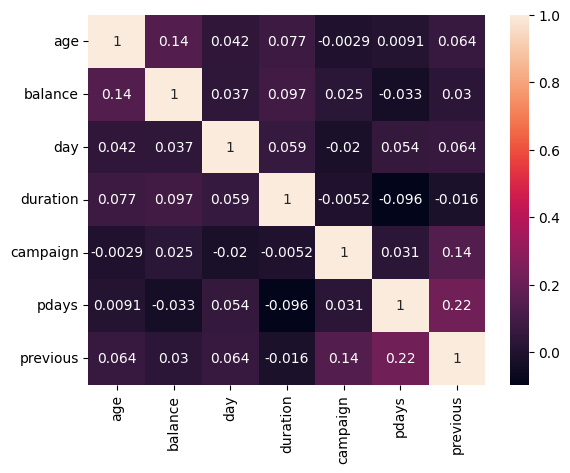

In [7]:
#create correlation matrix of the numeric fields
df_for_heatmap = df.select_dtypes(include=['number'])

sns.heatmap(df_for_heatmap.corr(), annot=True);

**Observations**
1. The strongest correlation (0.22) is between pdays and previous.  
1. That said, this correlation is low, as are the corralations between the other attributes.
1. Some correlations are negative.


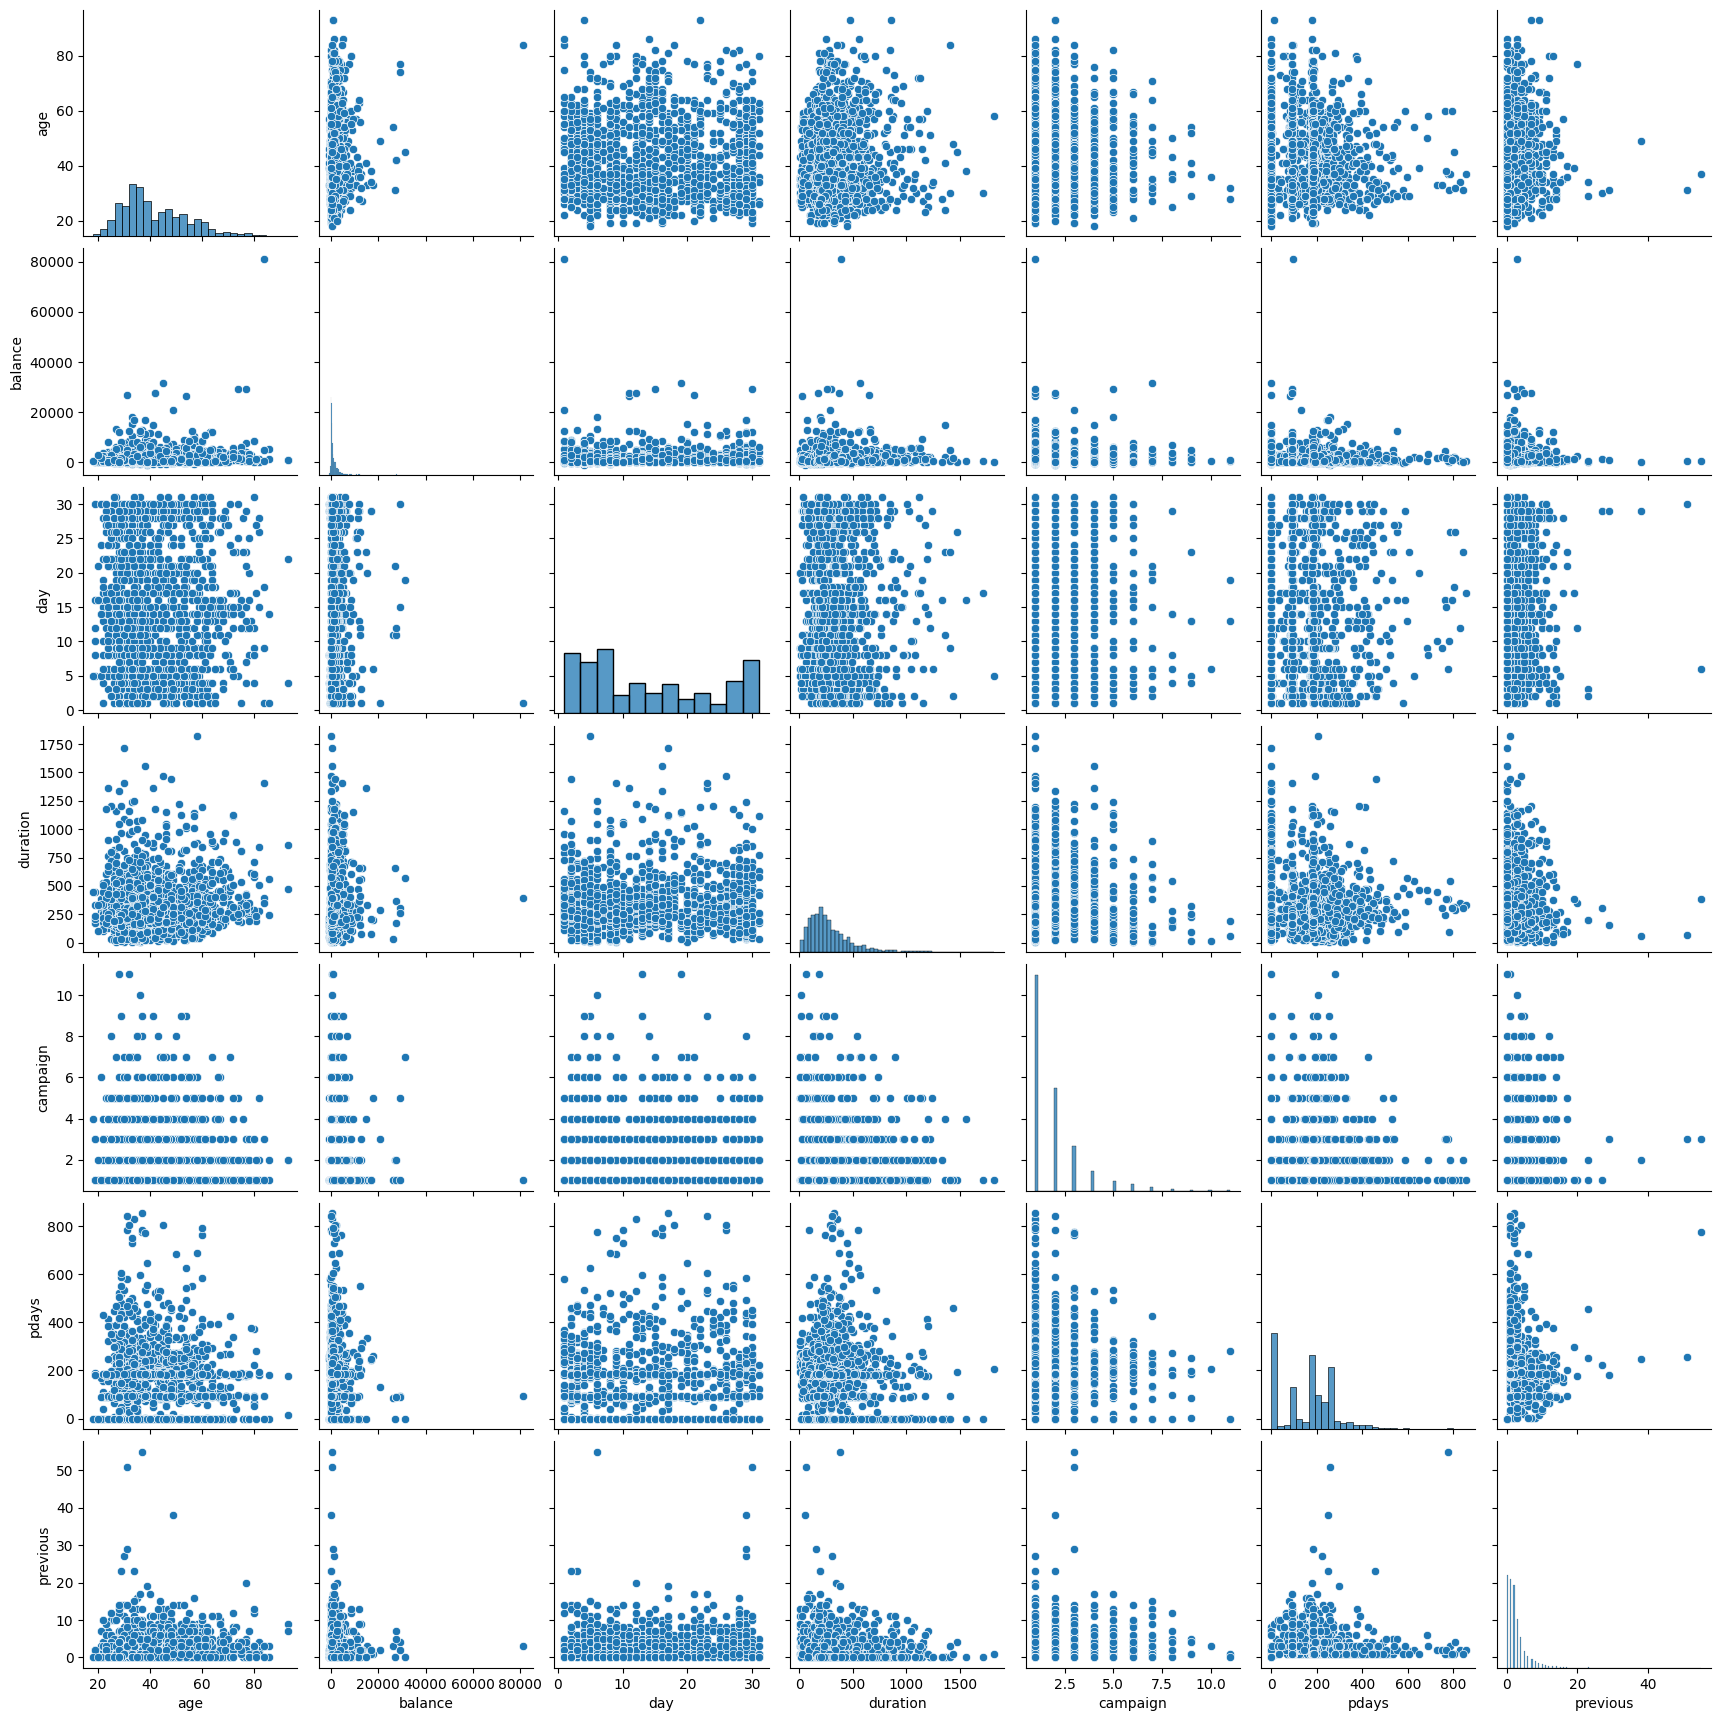

In [8]:
#
#  Given the low correlation between attributes, the pairplots may be of limited value
#
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','balance','day','duration','campaign','pdays','previous']].dropna())
plt.show()

# Distribution Analysis for Numerical Atributes

### Age

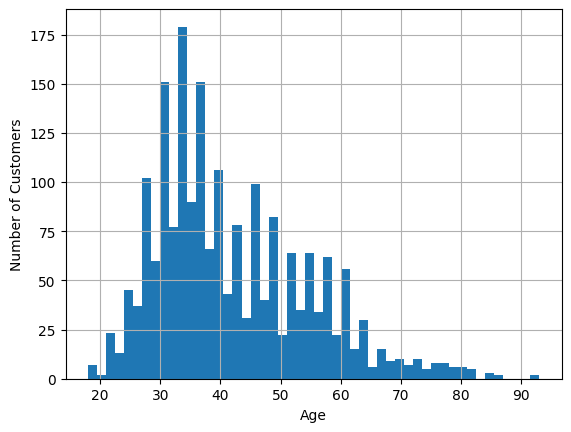

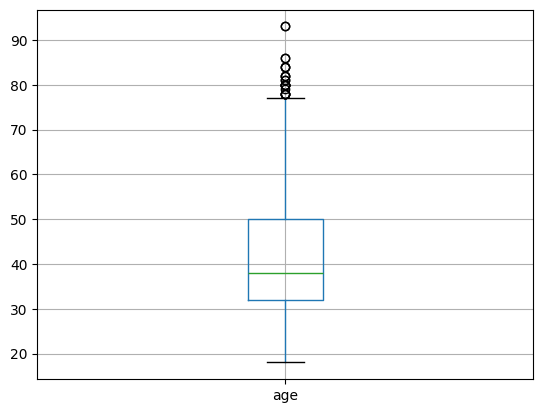

In [9]:
# Whats the distribution of Customers Age look like
df['age'].hist(bins=50);
plt.xlabel('Age');
plt.ylabel('Number of Customers');
plt.show()

# Let's start by plotting a histogram of Age using the command:

df.boxplot(column='age')
plt.show()

**Conclusion : Age**
1. It's a normal distribution
1. Outliers/extreme values exist for age


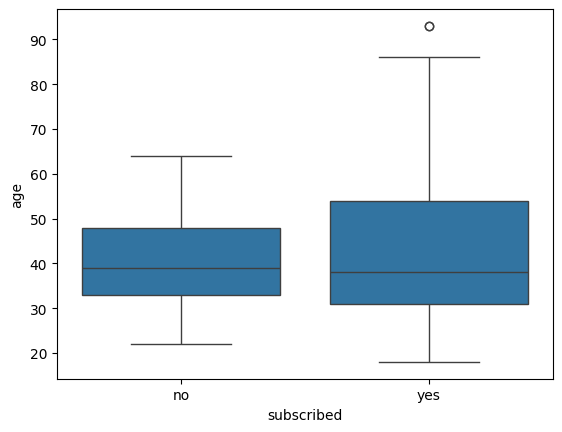

Box plot values of Age based on a Subscription taken out
            count       mean        std   min   25%   50%   75%   max
subscribed                                                           
no          991.0  40.655903   9.192425  22.0  33.0  39.0  48.0  64.0
yes         997.0  42.843531  15.382656  18.0  31.0  38.0  54.0  93.0


In [10]:
# age profile of those that subscribed
data_without_nulls = df[['age','subscribed']].dropna()
sns.boxplot(y='age', x = 'subscribed' ,data=data_without_nulls)
plt.show()

# Get specific values on the above
print('Box plot values of Age based on a Subscription taken out')
groupedBySubscribe = df.groupby('subscribed')['age'].describe()
print (groupedBySubscribe)

**Conclusion : Age by Subscribed**
1. For customers that did not subscribe to a deposit, 50% of these customers were aged between approximately 33 and 48 years of age.
1. For customers that did subscribe to a deposit, 50% of these customers were aged between approximately 31 and 54 years of age.
1. It had an outlier age in the early 90s.

### Balance

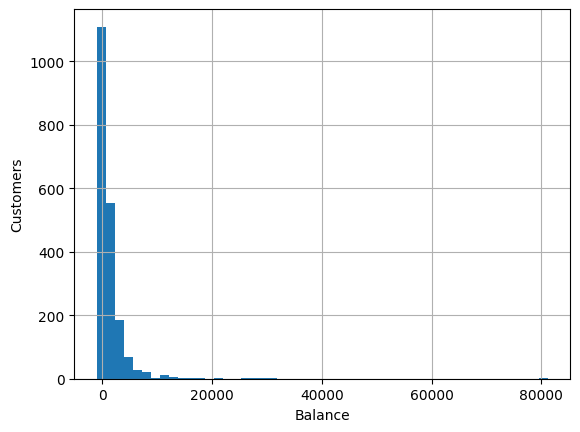

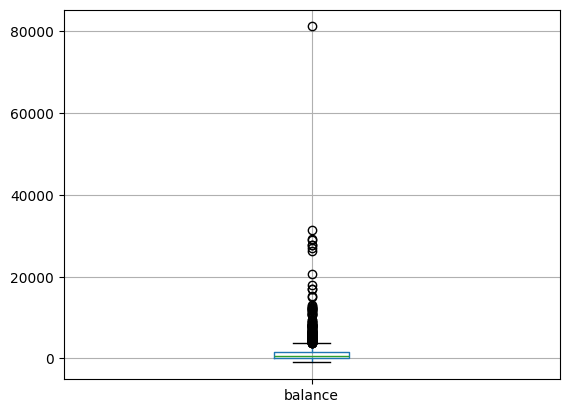

In [11]:
# Let's start by plotting a histogram of Balance using the command:

df['balance'].hist(bins=50);
plt.xlabel('Balance');
plt.ylabel('Customers');
plt.show()

# Drill into Balance with a boxplot:

df.boxplot(column='balance')
plt.show()

**Conclusion : Balance**
1. The histogram shows that there are a few extreme values for balance.  The box plot confirms this.
1. Balance has a right hand skewed distribution 

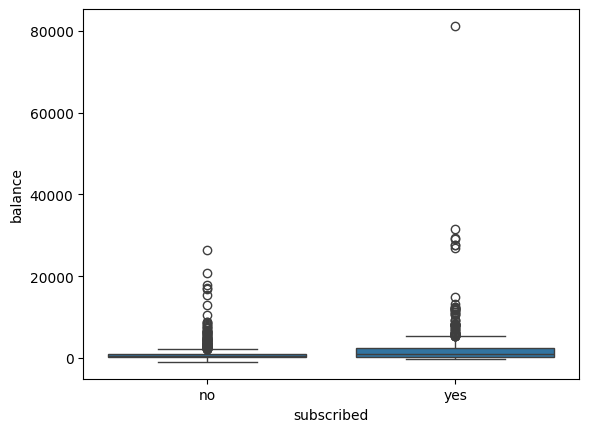

Box plot values of Age based on a Subscription taken out
             count      mean          std    min     25%    50%      75%  \
subscribed                                                                 
no          1000.0   942.862  2007.134003 -980.0  114.75  393.0   970.25   
yes         1000.0  1884.465  3891.864047 -205.0  315.00  875.0  2304.50   

                max  
subscribed           
no          26306.0  
yes         81204.0  


In [12]:

# balance profile of those that subscribed
data_without_nulls = df[['balance','subscribed']].dropna()
sns.boxplot(y='balance', x = 'subscribed' ,data=data_without_nulls)
plt.show()

# Get specific values on the above
print('Box plot values of Age based on a Subscription taken out')
groupedBySubscribe = df.groupby('subscribed')['balance'].describe()
print (groupedBySubscribe)

**Conclusion : Balance by Subscribed**
1. The balance is a right hand skewed distribution.
1. We see in the next describe() output that mean balance for those that did not subscribe was 942 and for those that did subscribe was 1884.
1. Outliers exist for balance.
1. Those that subscribed had a twice the average balance of those that did not subscribe to a deposit.

### Day

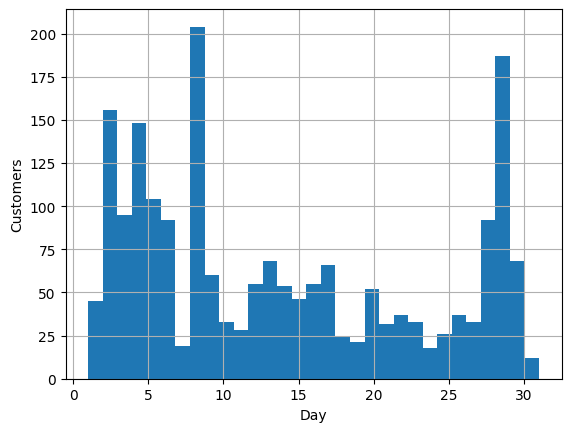

In [13]:
# Let's start by plotting a histogram of Balance using the command:

df['day'].hist(bins=31);
plt.xlabel('Day');
plt.ylabel('Customers');
plt.show()


**Conclusion : Day**
1. More customers tended to be contacted at the start of the month and in the last few days of the month 
1. Its a bimodal distribution.

### Duration

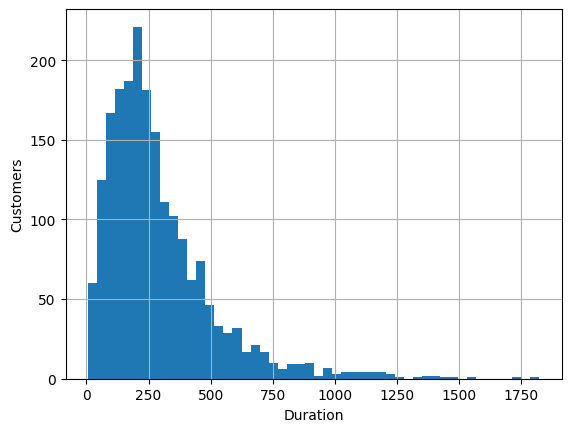

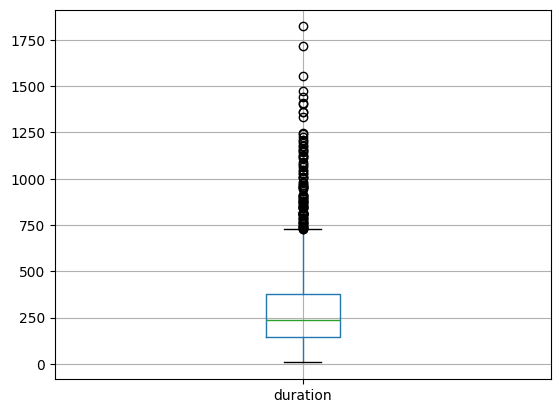

In [14]:
# Let's start by plotting a histogram of Duration using the command:

df['duration'].hist(bins=50);
plt.xlabel('Duration');
plt.ylabel('Customers');
plt.show()

# Drill into Duration with a boxplot:

df.boxplot(column='duration')
plt.show()

**Conclusion : Duration**
1. It's a right skewed distribution.  There are extreme values / outliers

### Campaign

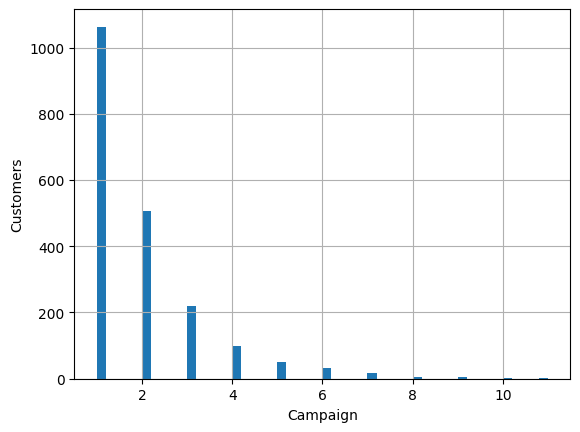

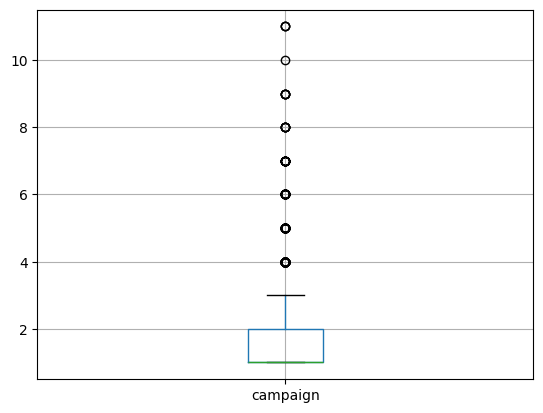

In [15]:
df['campaign'].hist(bins=50);
plt.xlabel('Campaign');
plt.ylabel('Customers');
plt.show()

# Drill into Duration with a boxplot:

df.boxplot(column='campaign')
plt.show()

**Conclusion : Campaign**
1. It's a right skewed distribution.  There are extreme values / outliers
2. 75% of customers have been twice or less.

### Pdays

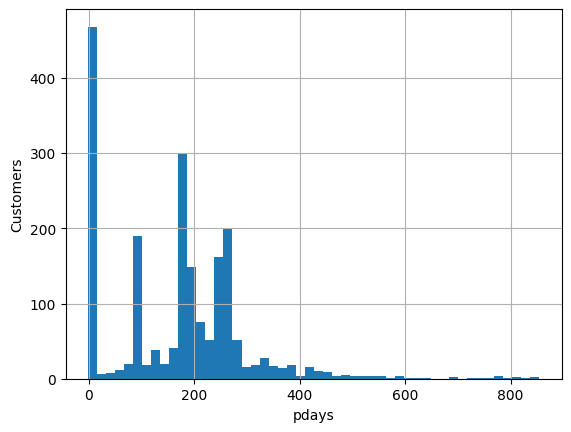

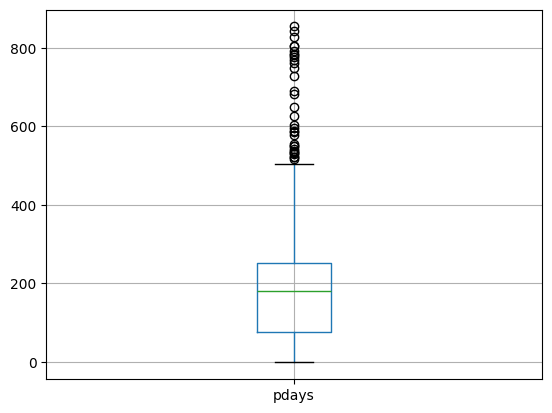

          count        mean         std    min     25%    50%     75%    max
previous                                                                    
0         454.0   -1.000000    0.000000   -1.0   -1.00   -1.0   -1.00   -1.0
1         438.0  243.940639  113.826481    1.0  185.25  245.5  271.00  842.0
2         407.0  227.928747  107.500979    1.0  181.00  206.0  265.00  854.0
3         240.0  213.529167  106.697551    1.0  169.00  189.5  261.25  784.0
4         150.0  201.920000   89.256400   33.0  168.50  190.0  251.75  805.0
5          85.0  181.705882   94.158911   21.0   93.00  182.0  212.00  551.0
6          57.0  179.017544   98.182682    1.0   96.00  182.0  197.00  683.0
7          44.0  166.613636   78.350499    1.0   92.75  183.0  199.00  445.0
8          32.0  167.062500   95.791082    1.0   92.00  181.0  201.25  424.0
9          23.0  181.913043   81.590392   13.0  109.00  185.0  236.50  378.0
10         19.0  145.421053   62.265842   31.0   90.50  179.0  182.50  258.0

In [16]:
# number of days that passed by after the client was last contacted from a previous campaign
df['pdays'].hist(bins=50);
plt.xlabel('pdays');
plt.ylabel('Customers');
plt.show()

df.boxplot(column='pdays')
plt.show()

# Get specific values on the above
groupedBySubscribe = df.groupby('previous')['pdays'].describe()
print (groupedBySubscribe)

**Conclusion : Pdays**
1. It's a bimodal distribution.  There are extreme values / outliers
1. 454 customers have not been contacted before

### previous

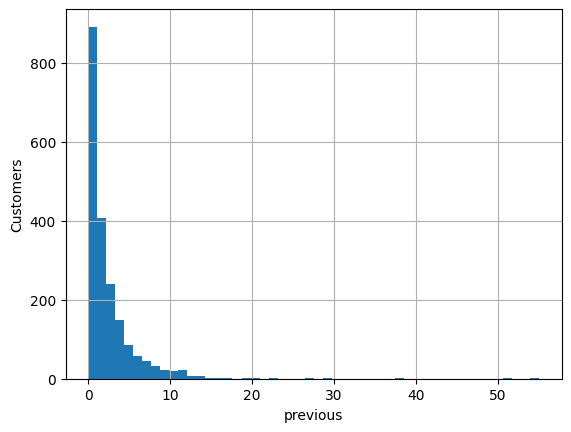

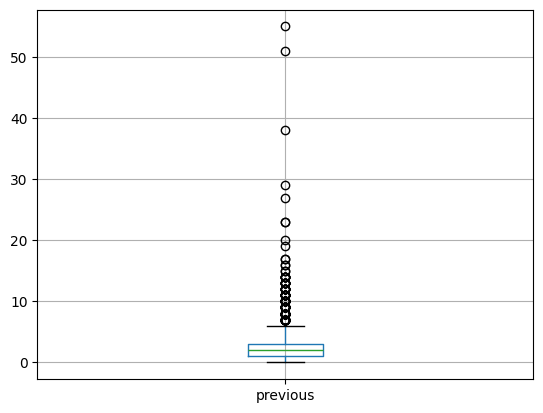

 subscribed by previous %


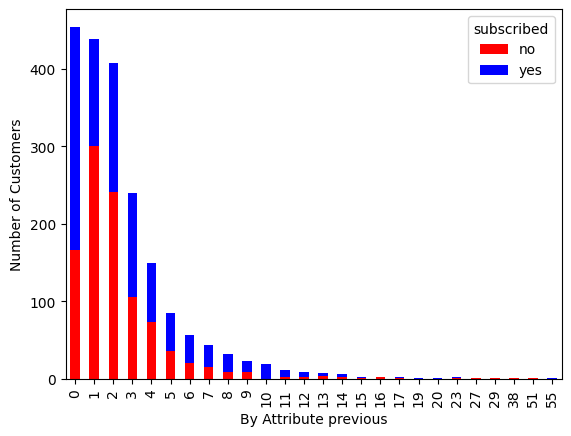

 subscribed by previous %
                     counts     percent
previous subscribed                    
0        no             166   36.563877
         yes            288   63.436123
1        no             300   68.493151
         yes            138   31.506849
2        no             241   59.213759
         yes            166   40.786241
3        no             106   44.166667
         yes            134   55.833333
4        no              74   49.333333
         yes             76   50.666667
5        no              36   42.352941
         yes             49   57.647059
6        no              21   36.842105
         yes             36   63.157895
7        no              16   36.363636
         yes             28   63.636364
8        no               9   28.125000
         yes             23   71.875000
9        no               9   39.130435
         yes             14   60.869565
10       yes             19  100.000000
11       no               3   25.000000
         yes  

In [17]:
df['previous'].hist(bins=50);
plt.xlabel('previous');
plt.ylabel('Customers');
plt.show()

df.boxplot(column='previous')
plt.show()

draw_cross_tab_by_subscribed(df,'previous')

# break down column by whether they subscribed or not
print_calculated_percentage_of_subscribed_by_attr(df, 'previous');

**Conclusion : previous**
1. It's a right skewed distribution.  There are extreme values / outliers
1. It is worth continuing to contact people, as those that do subscribe is generally higher or the same as those that do not.

# Examination of Categorical Attributes

In [18]:
cols = ['job','marital','education','contact','default','housing','loan','month','previous','poutcome']

for column in cols:
    print_value_counts_for_attr(df,column);
    
### Check for missing values.
df.isna().sum()

Column: job
job
management        461
technician        348
blue-collar       298
admin.            247
services          165
retired           162
student            96
unemployed         69
self-employed      64
entrepreneur       45
housemaid          35
Total            1990
Name: count, dtype: int64

Column: marital
marital
married     1111
single       674
divorced     215
Total       2000
Name: count, dtype: int64

Column: education
education
secondary     995
tertiary      684
primary       217
Total        1896
Name: count, dtype: int64

Column: contact
contact
cellular     1663
telephone     146
Total        1809
Name: count, dtype: int64

Column: default
default
no       1985
yes        15
Total    2000
Name: count, dtype: int64

Column: housing
housing
no       1037
yes       963
Total    2000
Name: count, dtype: int64

Column: loan
loan
no       1750
yes       250
Total    2000
Name: count, dtype: int64

Column: month
month
feb       404
may       333
jan       245
apr    

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64



**Observations on Categorical Columns**
1. 10 missing values for job
2. 104 missing values for education
1. 191 missing values for contact
1. 454 missing values for poutcome
1. 50% subscribed to a deposit.

# Distribution Analysis for Categorical Attributes

### Job

Column: job
job
management        461
technician        348
blue-collar       298
admin.            247
services          165
retired           162
student            96
unemployed         69
self-employed      64
entrepreneur       45
housemaid          35
Total            1990
Name: count, dtype: int64

 subscribed by job %
                          counts    percent
job           subscribed                   
admin.        no             117  47.368421
              yes            130  52.631579
blue-collar   no             221  74.161074
              yes             77  25.838926
entrepreneur  no              30  66.666667
              yes             15  33.333333
housemaid     no              15  42.857143
              yes             20  57.142857
management    no             210  45.553145
              yes            251  54.446855
retired       no              26  16.049383
              yes            136  83.950617
self-employed no              29  45.312500
            

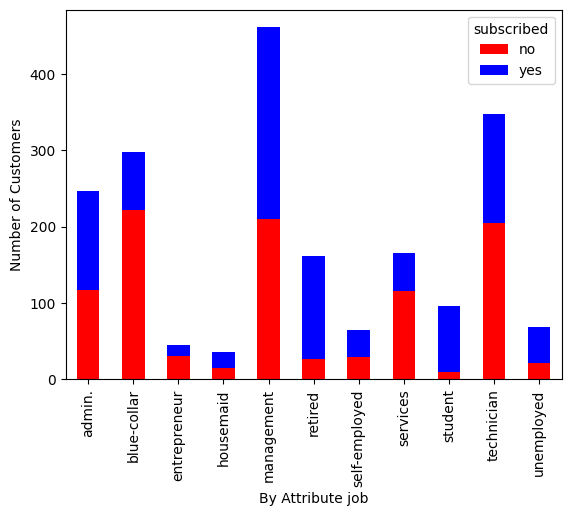

In [19]:
column ='job'

print_value_counts_for_attr(df, column);

# break down column by whether they subscribed or not
print_calculated_percentage_of_subscribed_by_attr(df, column);

print(f"Description: {col_dict[column]}")  

draw_cross_tab_by_subscribed(df,column)


**Conclusion : Job**
1. Managers, Technican, Blue collar and Admin are the largest categories in the dataset
1. 90% of students, 83% of retired and 69% of unemployed people subscribed to a deposit account.
1. 74% of blue-collar, 66% of entrepreneur and 69% of service workers did not subscribe to a deposit account.
1. A little over 50% of self employed, management, housemaids and admin subscribed to a deposit account.

### Marital

Column: marital
marital
married     1111
single       674
divorced     215
Total       2000
Name: count, dtype: int64

 subscribed by marital %
                     counts    percent
marital  subscribed                   
divorced no             121  56.279070
         yes             94  43.720930
married  no             610  54.905491
         yes            501  45.094509
single   no             269  39.910979
         yes            405  60.089021
Description: marital status
 subscribed by marital %


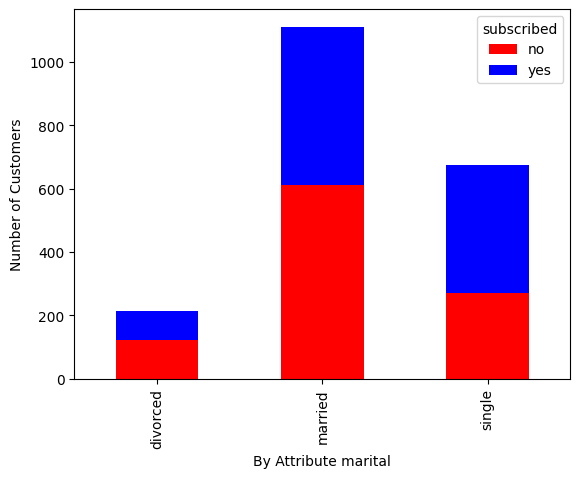

In [20]:
column ='marital'

print_value_counts_for_attr(df, column);

print_calculated_percentage_of_subscribed_by_attr(df, column)

print(f"Description: {col_dict[column]}")  

draw_cross_tab_by_subscribed(df,column)

**Conclusion**
1. Married people make up over half the data set
1. 60% of single people subscribed to a deposit account.
1. 54% of married people and 56% of divorced people did not subscribe to a deposit account.

### Education

Column: education
education
secondary     995
tertiary      684
primary       217
Total        1896
Name: count, dtype: int64

 subscribed by education %
                      counts    percent
education subscribed                   
primary   no             133  61.290323
          yes             84  38.709677
secondary no             544  54.673367
          yes            451  45.326633
tertiary  no             288  42.105263
          yes            396  57.894737
Description: education
 subscribed by education %


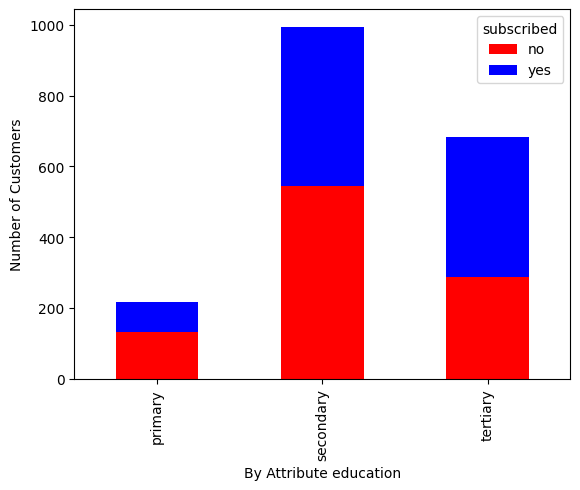

In [21]:
column ='education'

print_value_counts_for_attr(df, column);

print_calculated_percentage_of_subscribed_by_attr(df, column)

print(f"Description: {col_dict[column]}")  

draw_cross_tab_by_subscribed(df,column)

**Conclusion**
1. 104 Missing values
1. 57% of people with a tertiary education subsribed to a deposit account.
1. 45% of people with a seconary education subscribed to a deposit account.
1. 38% of people with a primary education subscribed to a deposit account.
1. Trending that as the education level reduces, the less likely they will subscribe to a deposit account

### Contact

Column: contact
contact
cellular     1663
telephone     146
Total        1809
Name: count, dtype: int64

 subscribed by contact %
                      counts    percent
contact   subscribed                   
cellular  no             778  46.782922
          yes            885  53.217078
telephone no              55  37.671233
          yes             91  62.328767
Description:  contact communication type 
 subscribed by contact %


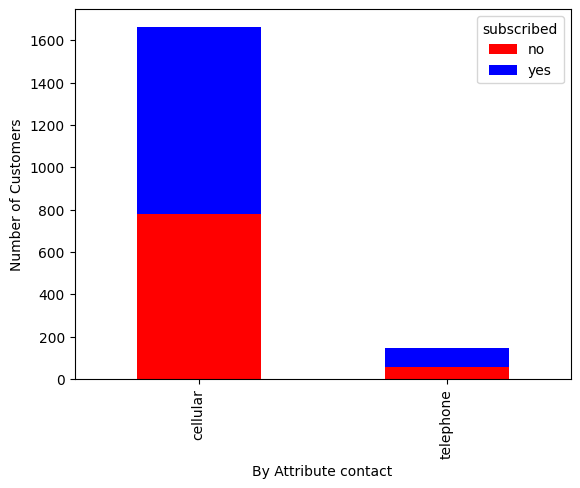

In [22]:
column ='contact'

print_value_counts_for_attr(df, column);

print_calculated_percentage_of_subscribed_by_attr(df, column)

print(f"Description: {col_dict[column]}")  

draw_cross_tab_by_subscribed(df,column)

**Conclusion**
1. 191 Missing values
1. 62% of people contacted via the telephone subscribed to a deposit account.
1. 53% of people contacted via cellular subscribed to a deposit account.

### poutcome

Column: poutcome
poutcome
failure     955
success     444
other       147
Total      1546
Name: count, dtype: int64

 subscribed by poutcome %
                     counts    percent
poutcome subscribed                   
failure  no             788  82.513089
         yes            167  17.486911
other    no              36  24.489796
         yes            111  75.510204
success  no              10   2.252252
         yes            434  97.747748
 subscribed by poutcome %


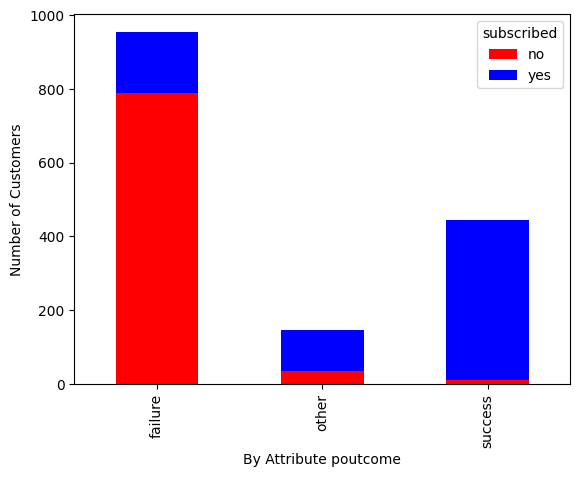

In [23]:
column = 'poutcome'
print_value_counts_for_attr(df, column);

print_calculated_percentage_of_subscribed_by_attr(df, column)

draw_cross_tab_by_subscribed(df,column)

**Conclusion**
1. 454 missing values
1. Those that had a poutcome of success or other in a previous marketing campaign subscribed to a deposit account.
1. Approx 85% of those that had a failure in a previous marketing campaign would not subscribe in another campaign.

### Month

Column: month
month
feb       404
may       333
jan       245
apr       205
jul       167
aug       136
sep       134
jun       104
oct        93
mar        70
nov        68
dec        41
Total    2000
Name: count, dtype: int64

 subscribed by month %
                  counts     percent
month subscribed                    
apr   no              79   38.536585
      yes            126   61.463415
aug   yes            136  100.000000
dec   no              29   70.731707
      yes             12   29.268293
feb   no             404  100.000000
jan   no             245  100.000000
jul   yes            167  100.000000
jun   yes            104  100.000000
mar   no               9   12.857143
      yes             61   87.142857
may   no             199   59.759760
      yes            134   40.240240
nov   no              32   47.058824
      yes             36   52.941176
oct   no               3    3.225806
      yes             90   96.774194
sep   yes            134  100.000000
 subscri

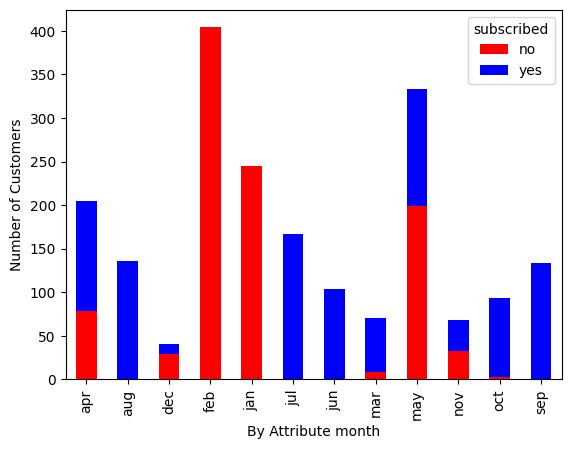

In [24]:
column = 'month'
print_value_counts_for_attr(df, column);

print_calculated_percentage_of_subscribed_by_attr(df, column)

draw_cross_tab_by_subscribed(df,column)


**Conclusion**
1. No campaigns were run in Jan. or Feb.
1. Customers for campaings run from Jun - Sep. all subscribed.
1. Recommend campaigns run from Mar to Nov.

### loan

Column: loan
loan
no       1750
yes       250
Total    2000
Name: count, dtype: int64

 subscribed by loan %
                 counts    percent
loan subscribed                   
no   no             793  45.314286
     yes            957  54.685714
yes  no             207  82.800000
     yes             43  17.200000
 subscribed by loan %


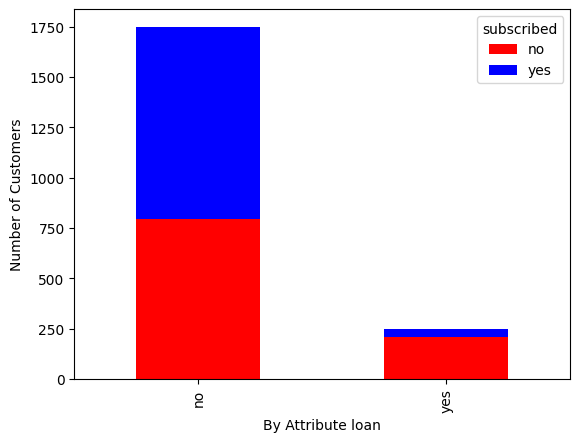

In [25]:
column = 'loan'
print_value_counts_for_attr(df, column);

print_calculated_percentage_of_subscribed_by_attr(df, column)

draw_cross_tab_by_subscribed(df,column)


**Conclusion**
1. Customers that have a loan are unlikely to subcribe to a deposit account.
1. Customer that do have a loan are a little more likely to subscribe to a deposit account than those that do not have a loan.

### Housing

Column: housing
housing
no       1037
yes       963
Total    2000
Name: count, dtype: int64

 subscribed by housing %
                    counts    percent
housing subscribed                   
no      no             240  23.143684
        yes            797  76.856316
yes     no             760  78.920042
        yes            203  21.079958
 subscribed by housing %


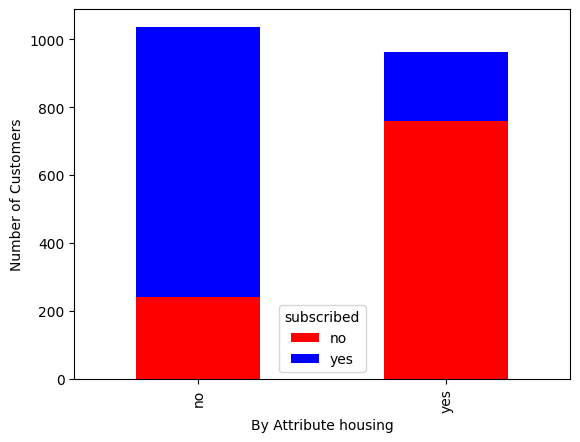

In [26]:
column = 'housing'
print_value_counts_for_attr(df, column);

print_calculated_percentage_of_subscribed_by_attr(df, column)

draw_cross_tab_by_subscribed(df,column)

**Conclusion**
1. Customer who do not have housing are likely to subscribe to a deposit account

### Default

Column: default
default
no       1985
yes        15
Total    2000
Name: count, dtype: int64

 subscribed by default %
                    counts    percent
default subscribed                   
no      no             986  49.672544
        yes            999  50.327456
yes     no              14  93.333333
        yes              1   6.666667
 subscribed by default %


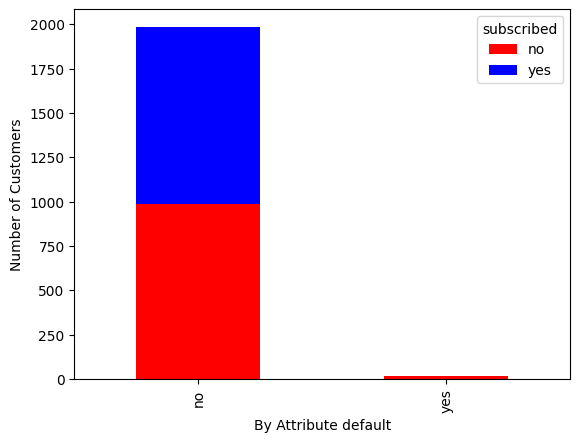

In [27]:
column = 'default'
print_value_counts_for_attr(df, column);

print_calculated_percentage_of_subscribed_by_attr(df, column)

draw_cross_tab_by_subscribed(df,column)


**Conclusion**
1. A customer being not being in default, does not give a good indicator that they will subcribe to a deposit or not.

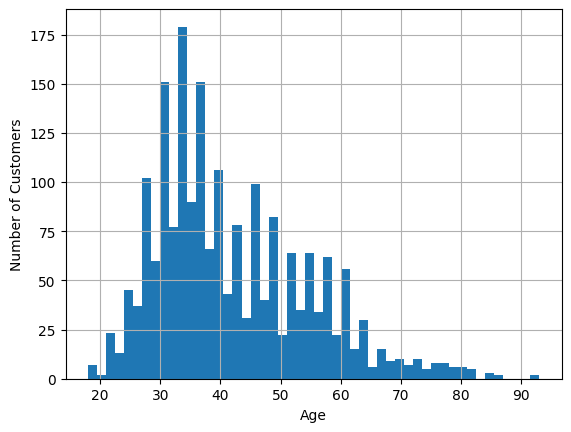

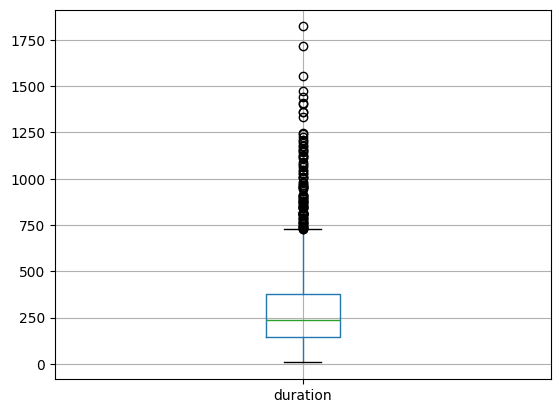

In [28]:
# Whats the distribution of Customers Age look like
df['age'].hist(bins=50);
plt.xlabel('Age');
plt.ylabel('Number of Customers');
plt.show()

# Box plot of duration

df.boxplot(column='duration')
plt.show()

***Conclusion***
1. The distribution of Age is a normal distribution.  There are extreme values / outliers
2. Duration has outliers.  The interquartile range is from approx 200 t0 400.  The median value is approximately 250.

##  Conclusion: Calculate statistics for the numerical and categorical attributes. 
1. There are 2000 records
1. Missing Values for Age, Job, Education, Contact, Poutcome
1. 50% of people subscribed to a deposit
1. Outliers exist for a number of attributes
1. Distribution of data is often right skewed.
1. Slight correlation between pdays and previous, though quite small.  Negative correlation for others.
1. Students, 83% of retired and 69% of unemployed people subscribed to a deposit account
1. Managers, Technican, Blue collar and Admin are the largest categories in the dataset

## E-tivity Task - Item - Use at least two different plotting techniques to plot the distribution of some numerical attributes.

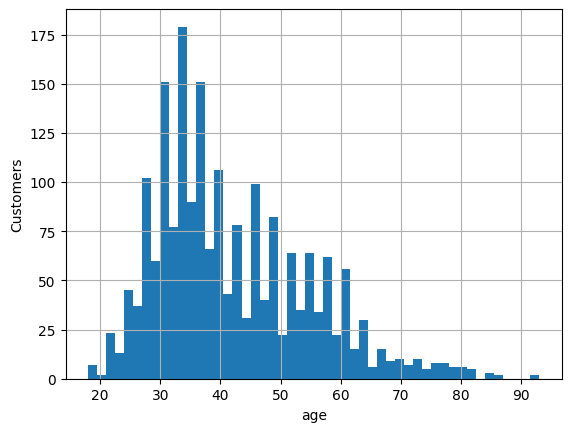

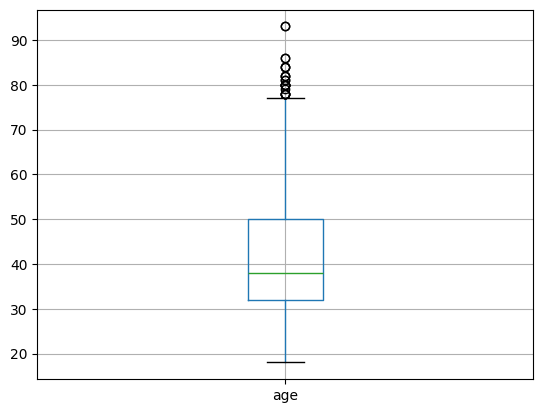

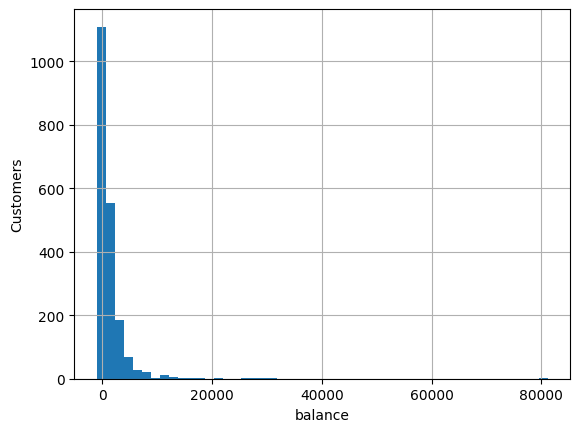

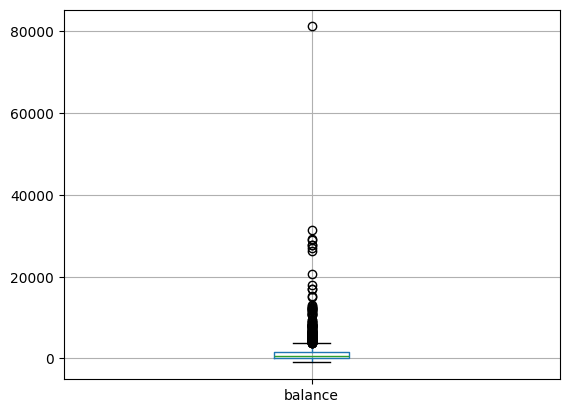

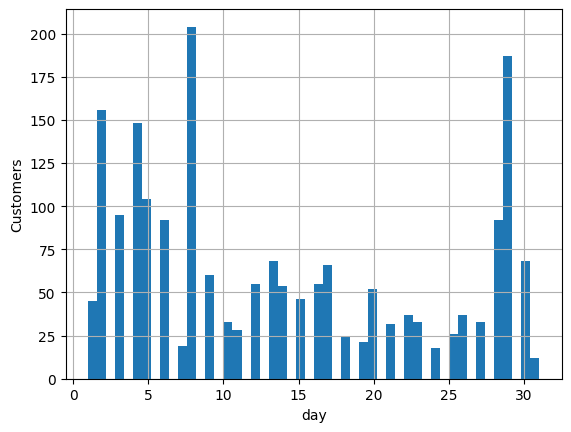

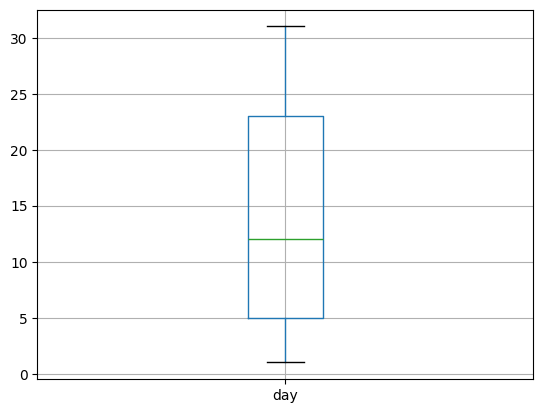

In [29]:
columns = ['age','balance', 'day']

for col in columns:
    df[col].hist(bins=50);
    plt.xlabel(col);
    plt.ylabel('Customers');
    plt.show()

    # Drill into above with a boxplot:

    df.boxplot(column=col)
    plt.show()

### Conclusion

## E-tivity Task - Item - Generate at least two plots with the combined distribution of attributes
1. Age and Balance have outliers
1. Balance and Age is a right skewed distribution
1. No outliers exist for day.
1. Customers tend to be contacted at the start of the month and towards the end of the month, more than in the middle of the month

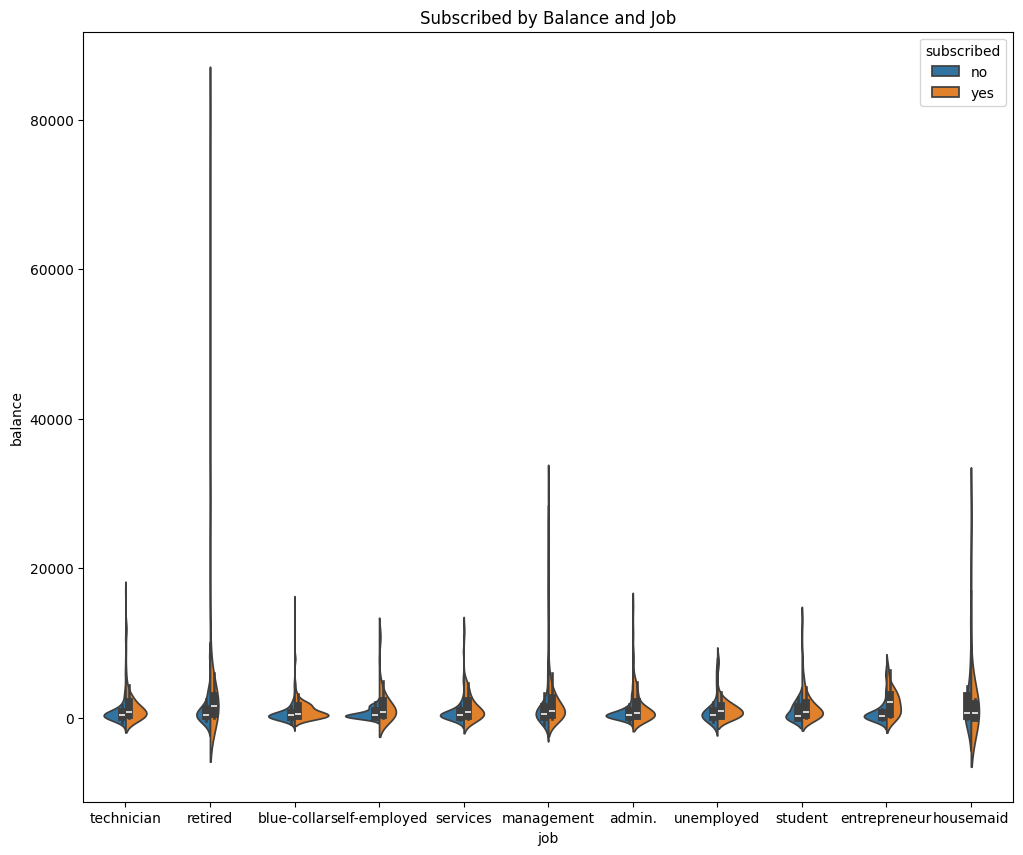

In [30]:

plt.figure(figsize=(12,10))
sns.violinplot(data=df, x='job', y='balance', hue='subscribed', split=True)
plt.title('Subscribed by Balance and Job')
plt.show()

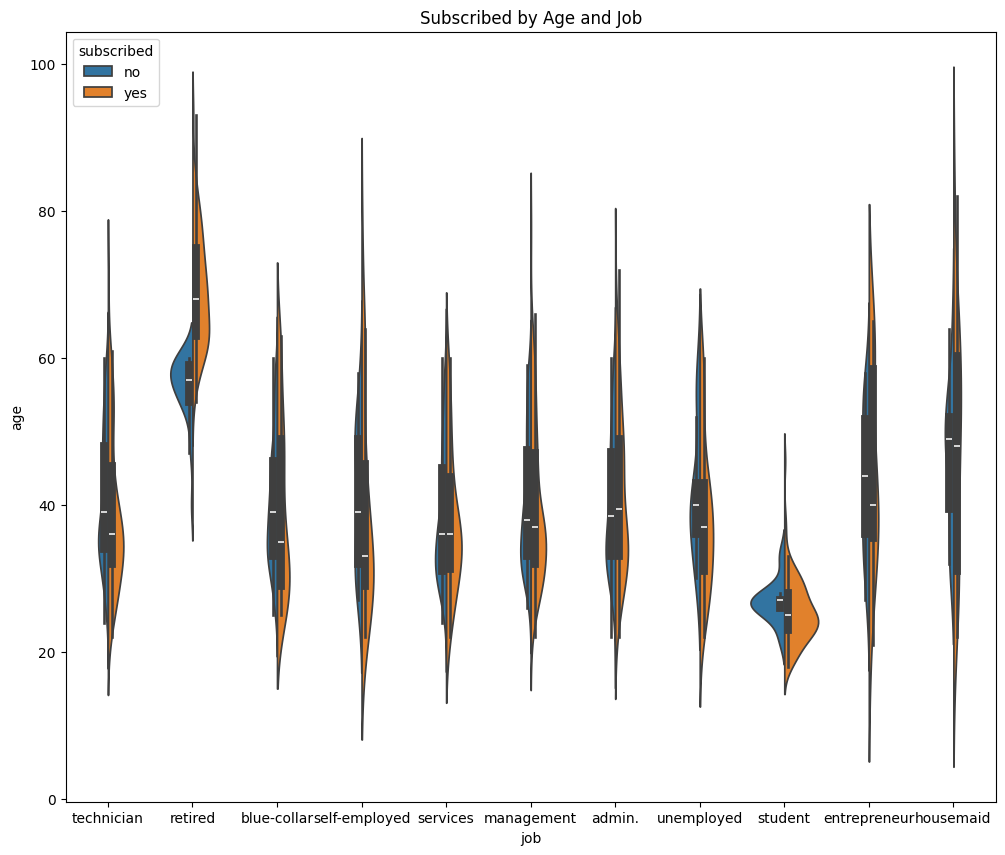

In [31]:
plt.figure(figsize=(12,10))
sns.violinplot(data=df, x='job', y='age', hue='subscribed', split=True)
plt.title('Subscribed by Age and Job')
plt.show()

***Conclusion***
1. The balance of those that subscribed to a deposit was slightly larger than the balance of those that did not subscribe to a deposit.
1. There are extreme values for balance in retired, management and housemaid.
1. The age range of the majority of subcribers across job category, is between 18 and 40.  
1. Most students that subscribed where approximately 22, with retirees that subscribed aged between 59 and 80

# Data Preparation

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


## Check for Missing Values

In [33]:
### Check for missing values.
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Summary of Missing Values
1. education, 5% of records
1. age, 12 records, < 1% of records
1. job, 10 records, < 1% of records
1. contact, 9.5% of records
1. poutcome, approx 22.5% of records

Observation: Could consider dropping rows with low records (age, job, maybe education), but dataset is small.

## C.1 Treatment of Missing Values in Numerical Columns

## Missing Attribute - Age - Outliers exist, imput median

In [34]:
# find number of nulls / NaN's 
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [35]:
# look at rows with age missing - only a few rows of the 2000
missing_age = df[df['age'].isnull()]
print (missing_age)

      age            job  marital  education default  balance housing loan  \
456   NaN  self-employed  married   tertiary      no      917      no   no   
472   NaN    blue-collar  married    primary      no      474     yes  yes   
526   NaN       services  married  secondary      no     2478     yes   no   
595   NaN     management  married   tertiary      no     1857      no   no   
597   NaN  self-employed  married  secondary     yes      254     yes  yes   
601   NaN         admin.   single  secondary      no      111     yes   no   
605   NaN     management  married   tertiary      no     1330     yes   no   
744   NaN     management  married   tertiary      no      -61      no   no   
795   NaN     technician   single   tertiary      no      992     yes   no   
1171  NaN        retired  married   tertiary      no     2812      no   no   
1232  NaN        student   single  secondary      no      431      no   no   
1408  NaN  self-employed   single   tertiary      no      251   

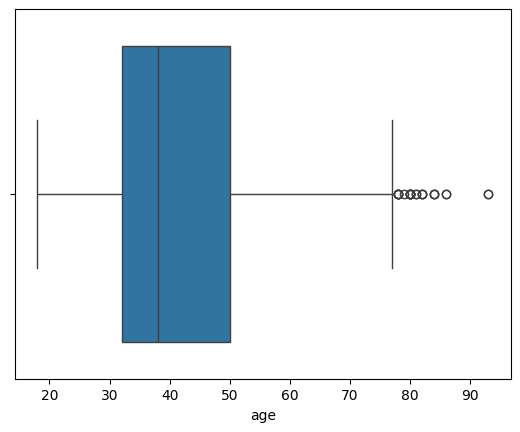

In [36]:
# look at missing values column data - Age - Outliers exist, lets add in the median value, TODO - see why when inplace=True it wasn't working
sns.boxplot(x='age', data=df)
plt.show()

In [37]:
df['age']=df['age'].fillna(df['age'].median())

### Check for missing values.
missing_age = df[df['age'].isnull()]
print (missing_age)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, subscribed]
Index: []


## C.2 Treatment of Missing Values in Categorical Columns
These are job, education, poutcome and contact

### Education - Approx 5% missing - Insert mode

In [38]:
print_value_counts_for_attr(df, 'education')

Column: education
education
secondary     995
tertiary      684
primary       217
Total        1896
Name: count, dtype: int64



In [39]:
# 104 missing out of 2000, lets replace with the most frequent value
mode_value = df['education'].mode()[0];
print(mode_value)


df['education'] = df['education'].fillna(mode_value)
# check to ensure updated
print_value_counts_for_attr(df, 'education')

secondary
Column: education
education
secondary    1099
tertiary      684
primary       217
Total        2000
Name: count, dtype: int64



### contact - Approx - 10% missing - Insert mode

In [40]:
print_value_counts_for_attr(df, 'contact')

Column: contact
contact
cellular     1663
telephone     146
Total        1809
Name: count, dtype: int64



In [41]:
# 191 missing out of 2000, lets replace with the most frequent value
mode_value = df['contact'].mode()[0];
print('Contact Mode = ' +mode_value)

df['contact'] = df['contact'].fillna(mode_value)
# check to ensure updated
print_value_counts_for_attr(df, 'contact')

Contact Mode = cellular
Column: contact
contact
cellular     1854
telephone     146
Total        2000
Name: count, dtype: int64



### poutcome - Missing values likely to be due to Customers not having been contacted - Imput new Not_Contacted value

In [42]:
# check if any relation to previous
attribute = 'poutcome'
print(' subscribed by ' + attribute + ' %')

groupedByJobSubscribed = df.groupby([attribute,'previous']).size()

job_totals = df.groupby(attribute).size()

grouped_percent = (groupedByJobSubscribed/job_totals) * 100

merged = pd.DataFrame({'counts' : groupedByJobSubscribed,
                      'percent' : grouped_percent})
print (merged)

zero_count_columns = (df['previous'] == 0).sum()
print(zero_count_columns)

 subscribed by poutcome %
                   counts    percent
poutcome previous                   
failure  1            328  34.345550
         2            277  29.005236
         3            125  13.089005
         4             79   8.272251
         5             42   4.397906
         6             27   2.827225
         7             23   2.408377
         8             13   1.361257
         9             13   1.361257
         10             2   0.209424
         11             2   0.209424
         12             5   0.523560
         13             5   0.523560
         14             3   0.314136
         15             2   0.209424
         16             1   0.104712
         17             1   0.104712
         20             1   0.104712
         23             1   0.104712
         27             1   0.104712
         29             1   0.104712
         38             1   0.104712
         51             1   0.104712
         55             1   0.104712
other    1  

In [43]:
# Looks like poutcome won't be filled out if they haven't been contacted before, which is reasonable.  For these rows, imput not_contacted
df['poutcome']=df['poutcome'].fillna('not_contacted')

# check it's imputted
valueCounts = df['poutcome'].value_counts()
print(valueCounts)


poutcome
failure          955
not_contacted    454
success          444
other            147
Name: count, dtype: int64


### Job - Approx 0.5% of records missing - Imput mode

In [44]:
print_value_counts_for_attr(df, 'job')

Column: job
job
management        461
technician        348
blue-collar       298
admin.            247
services          165
retired           162
student            96
unemployed         69
self-employed      64
entrepreneur       45
housemaid          35
Total            1990
Name: count, dtype: int64



In [45]:
#  missing out of 2000, lets replace with the most frequent value
mode_value = df['job'].mode()[0];
print('Job Mode = ' + mode_value)

df['job'] = df['job'].fillna(mode_value)
# check to ensure updated
print_value_counts_for_attr(df, 'job')

Job Mode = management
Column: job
job
management        471
technician        348
blue-collar       298
admin.            247
services          165
retired           162
student            96
unemployed         69
self-employed      64
entrepreneur       45
housemaid          35
Total            2000
Name: count, dtype: int64



### Missing Value Imput strategy
1. Age: The number of missing records is low. Outliers exist so I chose to use the median value for the missing field values.
1. Education : The number of missing records is low.  I chose to use the most frequent value here.
1. Contact : The number of missing records is low.  I chose to use the most frequent value here.
1. poutcome : The missing values are likely due to the customer not having been contacted.  For this, I generated a new value, Not_Contacted.  The dataset has values of Other, I didn't want to use this, in case it has some significance later.
1. Job : The number of missing records is low.  I chose to use the most frequent value here.


## B. Process and Encode the Categorical Features

### Psuedo Key Values / Generated Key Values
There are none.

In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


### Encode Ordinal Categorical Attributes

#### Month
I'm not sure we care too much about the relationship (closeness) of one month to another for this dataset, so just encoding month as an ordinal

In [47]:
scale_mapper = {
"jan":0,
"feb":1,
"mar":2,
"apr":3,
"may":4,
"jun":5,
"jul":6,
"aug":7,
"sep":8,
"oct":9,
"nov":10,
"dec":11}

df['month'] = df['month'].replace(scale_mapper)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,secondary,no,2785,no,no,cellular,16,8,327,2,-1,0,not_contacted,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,8,1334,2,-1,0,not_contacted,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,8,231,1,-1,0,not_contacted,yes
1998,46.0,services,married,primary,no,4343,yes,no,cellular,20,8,185,1,-1,0,not_contacted,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,8,208,2,-1,0,not_contacted,yes


#### Education 

In [48]:
# Create a mapper for education

scale_mapper = {
    "primary": 0,
"secondary":1,
"tertiary":2
}

df['education'] = df['education'].replace(scale_mapper)
df.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,1,no,2785,no,no,cellular,16,8,327,2,-1,0,not_contacted,yes
1996,28.0,admin.,single,1,no,127,no,no,cellular,16,8,1334,2,-1,0,not_contacted,yes
1997,81.0,retired,married,0,no,1154,no,no,telephone,17,8,231,1,-1,0,not_contacted,yes
1998,46.0,services,married,0,no,4343,yes,no,cellular,20,8,185,1,-1,0,not_contacted,yes
1999,40.0,entrepreneur,married,1,no,6403,no,no,cellular,22,8,208,2,-1,0,not_contacted,yes


## One-Hot Encode All Other Categorical Attributes

In [49]:
# find columns with nan's
nan_cols = df.isna().any()

# 
print(nan_cols[nan_cols == True])

Series([], dtype: bool)


In [50]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_not_contacted,poutcome_other,poutcome_success,subscribed_yes
0,32.0,392,1,957,2,131,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,39.0,688,1,233,2,133,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,59.0,1035,1,126,2,239,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,47.0,398,1,274,1,238,2,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,54.0,1004,1,479,1,307,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Rescaling Features

Attribute age


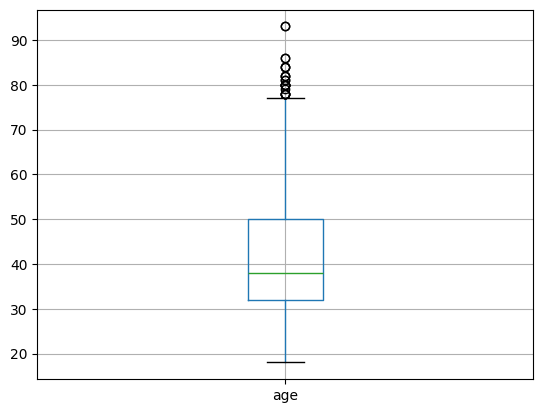

Attribute balance


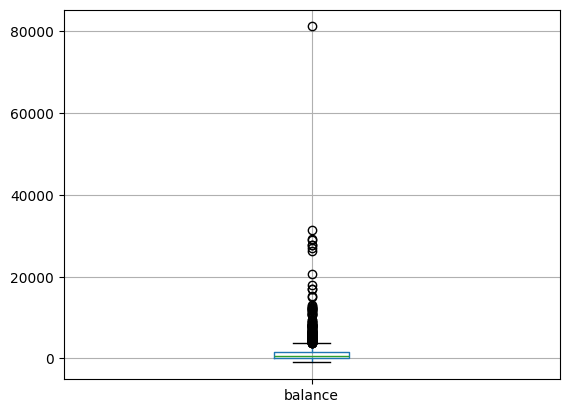

Attribute day


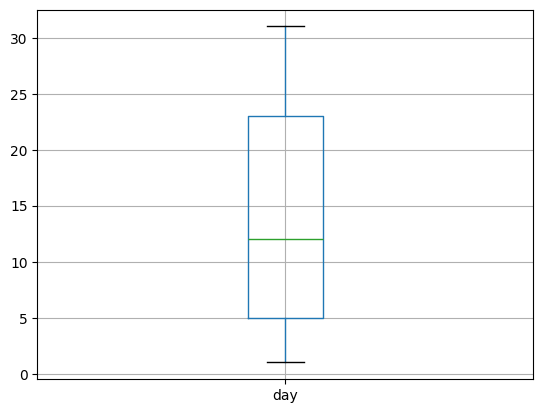

Attribute duration


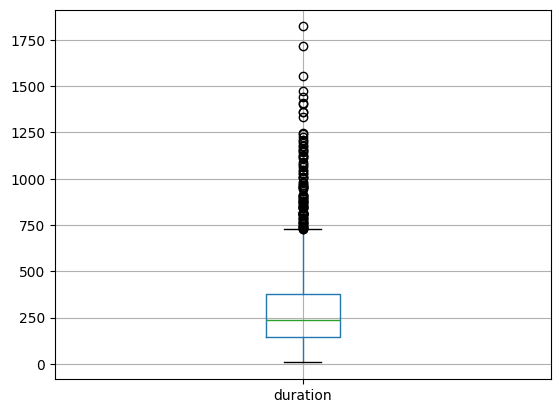

Attribute campaign


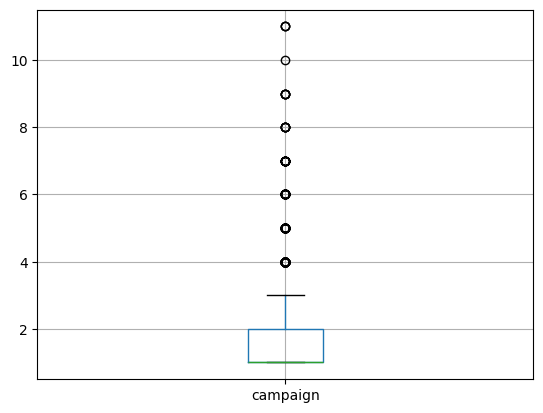

Attribute pdays


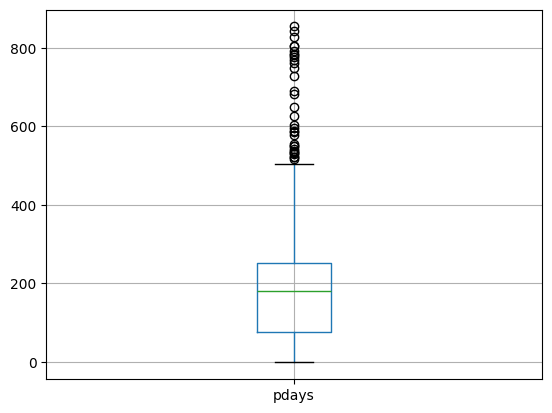

Attribute previous


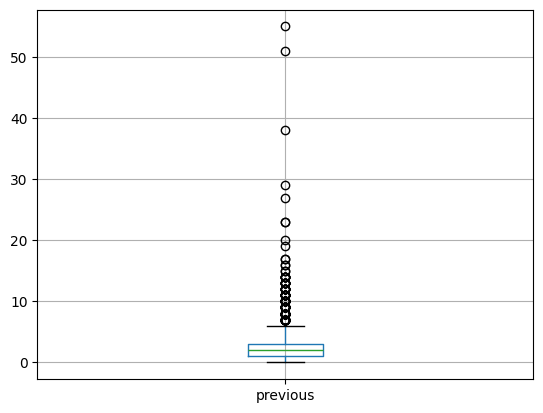

In [51]:
# check for outliers
columns = ['age','balance','day','duration','campaign','pdays','previous']

for col in columns:
    print ('Attribute ' + col)
    df.boxplot(column=col)
    plt.show()

In [52]:
# The all have outliers / extreme values with the exception of day.  
# Use robustScalar on all but day.
# Use minmax on day
robust_scaler = RobustScaler()

df[['age','balance','duration','campaign','pdays','previous']] = robust_scaler.fit_transform(df[[
    'age','balance','duration','campaign','pdays','previous']])

minMax_scalar = MinMaxScaler()

df[['day']] = minMax_scalar.fit_transform(df[[
    'day']])

df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_not_contacted,poutcome_other,poutcome_success,subscribed_yes
0,-0.333333,-0.110187,0.0,3.094421,1.0,-0.291013,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.055556,0.094941,0.0,-0.012876,1.0,-0.279601,-0.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.166667,0.335412,0.0,-0.472103,1.0,0.325250,-0.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.500000,-0.106029,0.0,0.163090,0.0,0.319544,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.888889,0.313929,0.0,1.042918,0.0,0.713267,-0.5,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Conclusion - Scalar Choice
1. The attributes, age,balance,duration,campaign,pdays,previous all had outliers, so the RobustScalar was used as it can best deal with outliers.
1. There were no outliers for Day, so the MinMax scalar was used for it.

# Treatment of Outliers

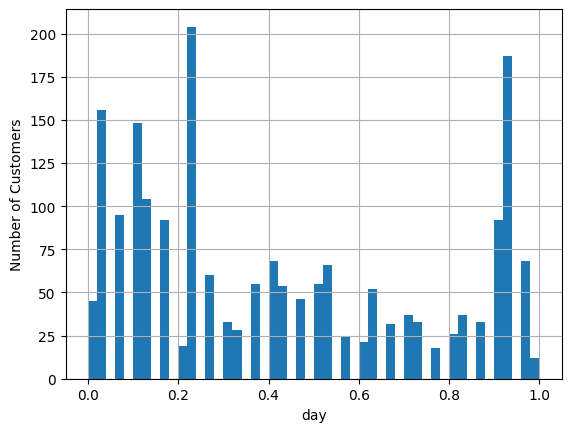

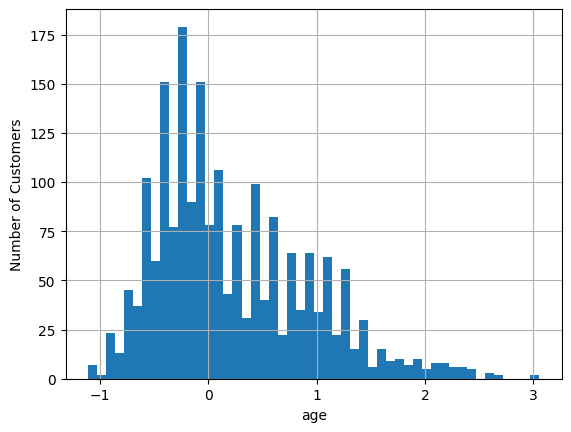

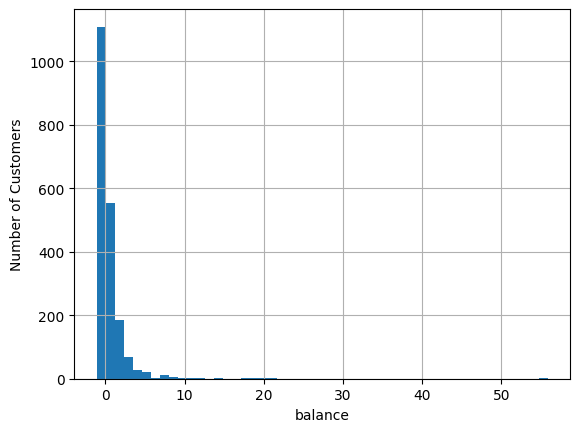

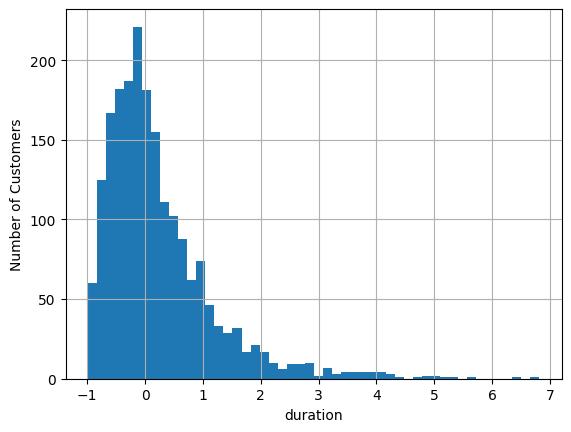

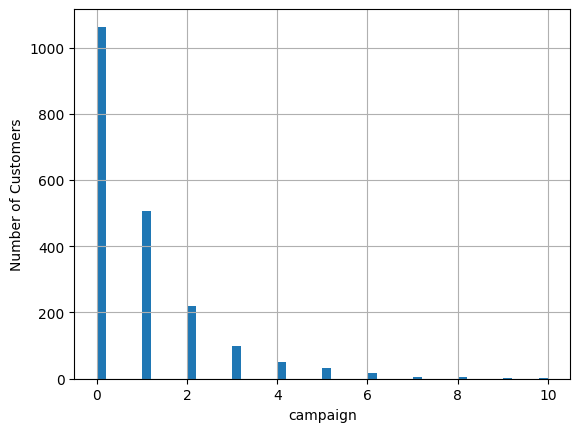

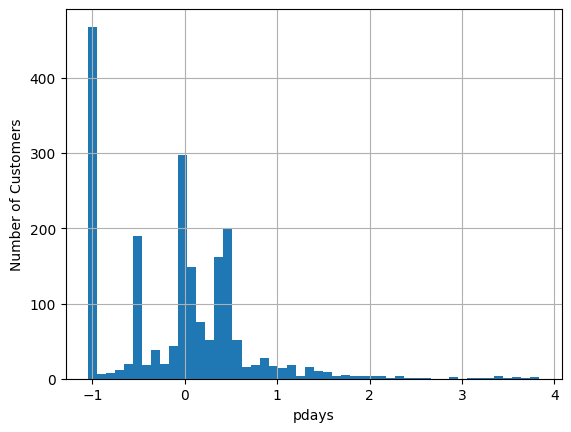

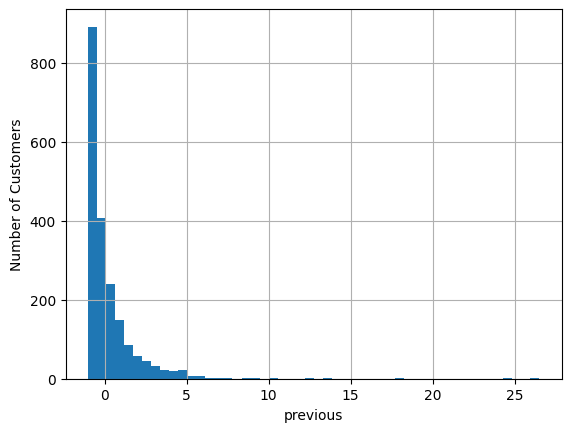

In [53]:
# check the distribution, outliers shown above in box plots - they all have outliers except for day.
columns = ['day','age','balance','duration','campaign','pdays','previous']

for col in columns:
    # Whats the distribution of Customers Age look like
    df[col].hist(bins=50);
    plt.xlabel(col);
    plt.ylabel('Number of Customers');
    plt.show()

***Comment***
1. While outliers exist in the above attributes with the exception of day, the value range is not unreasonable for the attribute values.  1. The distribution graphs look right hand skewed so see if we can diminish their effect on ML learning models by applying a log transform.


In [54]:
# get min values for attributes
columns = ['age','balance','duration','campaign','pdays','previous']


# Whats the distribution of Customers Age look like
min_values = df[columns].min();
print(min_values);



age        -1.111111
balance    -1.060984
duration   -0.982833
campaign    0.000000
pdays      -1.044223
previous   -1.000000
dtype: float64


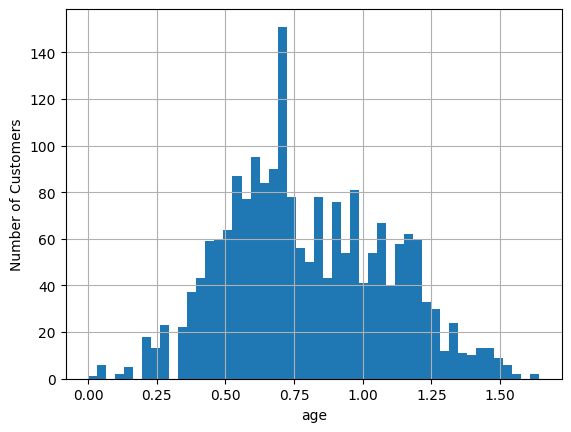

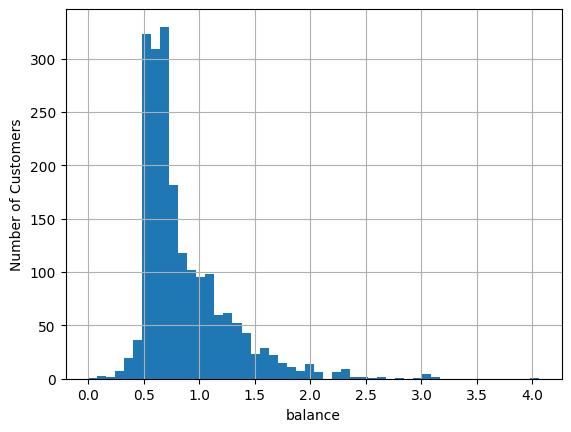

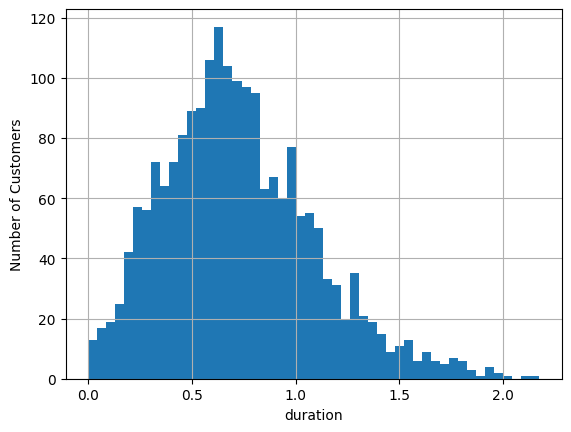

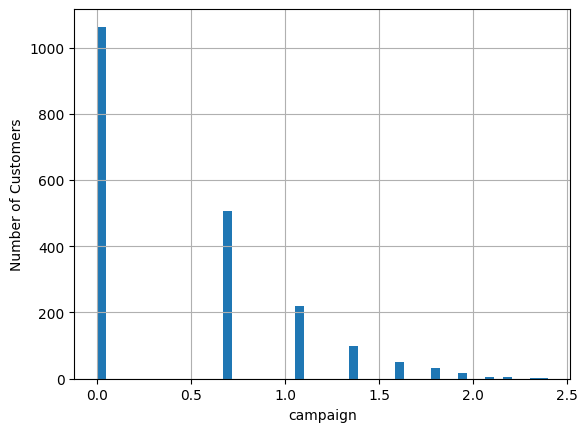

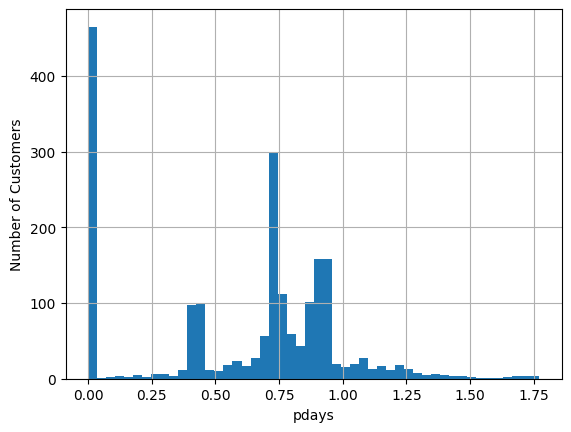

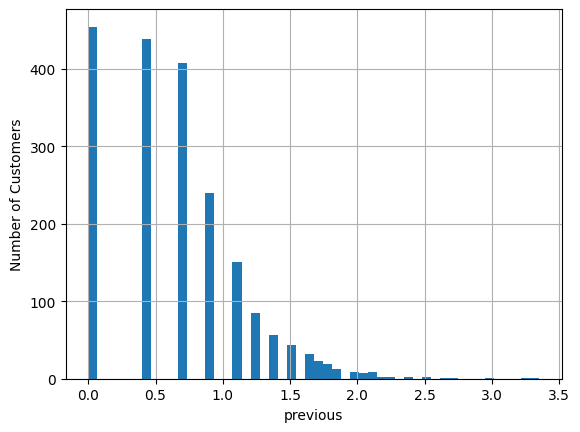

In [55]:
# apply log transform to attributes adding -1 
columns_with_minus = ['age','balance','duration','pdays','previous']

for col in columns_with_minus:
    df[col] = np.log(df[col] + abs(min(df[col])) + 1)

df['campaign'] = np.log(df['campaign'] +1)

# redo charts
for col in columns:
    # Whats the distribution of Customers Age look like
    df[col].hist(bins=50);
    plt.xlabel(col);
    plt.ylabel('Number of Customers');
    plt.show()

In [56]:
# have a look at previous, pdays, campaign - didn't change that much,
#df_orig['previous','pdays','campaign'].value_counts()

print_value_counts_for_attr(df_orig, 'previous')
print_value_counts_for_attr(df_orig, 'pdays')
print_value_counts_for_attr(df_orig, 'campaign')

Column: previous
previous
0         454
1         438
2         407
3         240
4         150
5          85
6          57
7          44
8          32
9          23
10         19
11         12
12          9
13          8
14          7
23          2
15          2
16          2
17          2
27          1
38          1
29          1
51          1
20          1
55          1
19          1
Total    2000
Name: count, dtype: int64

Column: pdays
pdays
-1        454
182        68
181        62
92         51
91         41
         ... 
43          1
82          1
277         1
409         1
Total    2000
Name: count, Length: 364, dtype: int64

Column: campaign
campaign
1        1063
2         506
3         219
4          99
5          50
6          31
7          17
8           6
9           5
11          3
10          1
Total    2000
Name: count, dtype: int64



***Comment***
1. Not sure what to do here, perhaps a minmaxscalar may have been more suitable for these attributes, previous, campaign and pdays.

# Creation of Derived Features
Following on from discovering (below) that Students, Retirees and Unemployed were likely to subscribe to a deposit account, create a feature for that grouping

In [57]:
def cat_student_retiree_unemployed(job):
    if ( job in ['student','retired','unemployed']):
        return 'CallFirst';

    return

    
df_orig['call_first'] = df_orig['job'].apply(cat_student_retiree_unemployed);

df_orig.head()
    


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,call_first
0,32.0,technician,single,2,no,392,yes,no,cellular,1,3,957,2,131,2,failure,no,None
1,39.0,technician,divorced,1,no,688,yes,yes,cellular,1,3,233,2,133,1,failure,no,None
2,59.0,retired,married,1,no,1035,yes,yes,cellular,1,3,126,2,239,1,failure,no,CallFirst
3,47.0,blue-collar,married,1,no,398,yes,yes,cellular,1,3,274,1,238,2,failure,no,None
4,54.0,retired,married,1,no,1004,yes,no,cellular,1,3,479,1,307,1,failure,no,CallFirst


## Data Preparation Summary
1. Missing values where found - education, age, job, contact and poutcome had missing values
1. The amount of missing values was relatively small
1. For Age, outliers existed, median value was chosen for imputted values
1. For poutcome, felt it was related to number of contacts and a new value was created
1. For the remaining, the mode value was used
1. Mappers were used for Month and Education
1. Robust Scalar was used on all but the day attribute, due to the presence of outliers on all except day.
1. The value range for attributes with outliers were not unreasonable so a transform was applied to try and deal with the right skewed nature of their distribution.  This helped a little, but for the attributes previous, pdays and campaign  it didn’t really change their distribution.
1. A new attribute, call_first, was created using the job of student, retiree or unemployed, to capture the 3 top groups likely to subscribe to a deposit

In [58]:
## E-tivity Task - Item - Generate at least two plots with the combined distribution of attributes. Draw a short conclusion

In [59]:
# Refresh the dataset
df = pd.read_csv('./bank.csv')

##  E-tivity Task - Item 1 - Formulate a particular question that might be interesting to answer by exploring the  bank dataset.
What type of customers should we target and how should we target them in order to get them to subscribe to a term deposit.

In [60]:
### Investigate question using graphs where data is grouped by whether customer took out a subscription or not.

### Numerical Attributes graphed by whether they subscribed or not 


Column: age
Description: age


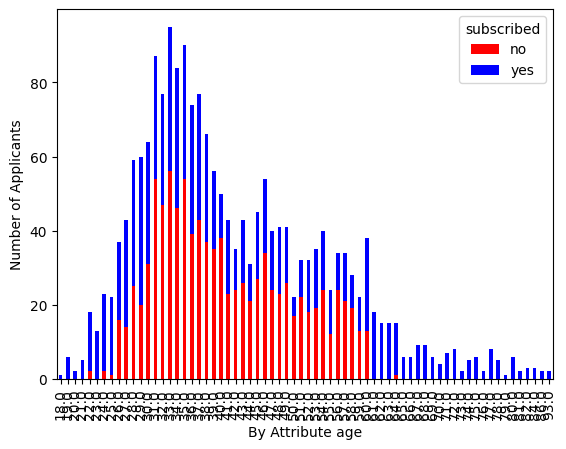

Column: day
Description:  last contact day of the month (numeric)


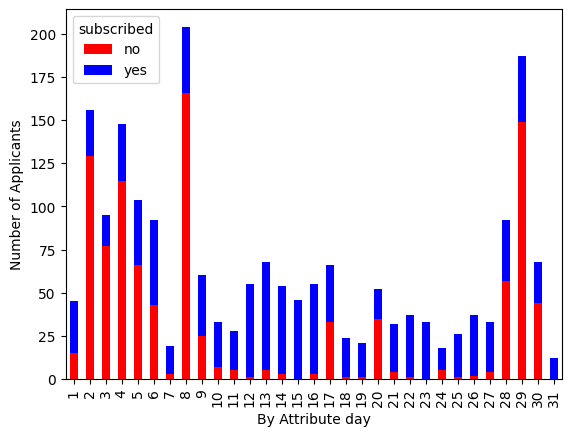

Column: month
Description:  last contact month of year 


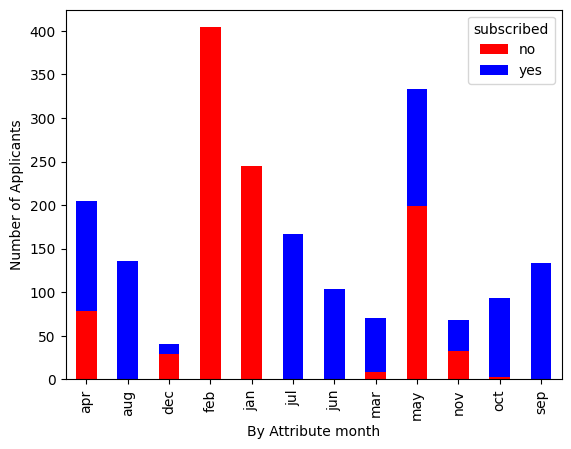

Column: duration
Description:  last contact duration, in seconds (numeric)


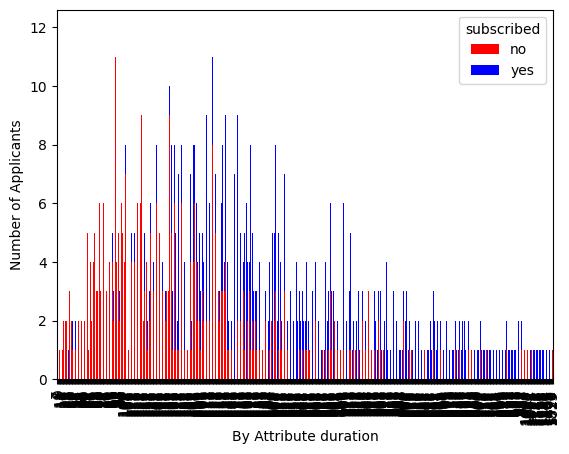

Column: pdays
Description:  number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)


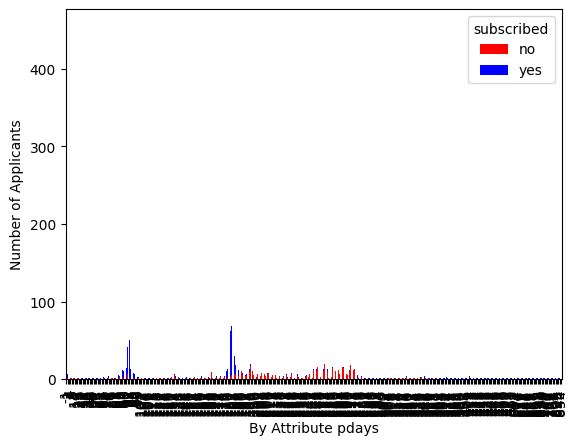

Column: previous
Description:  number of contacts performed before this campaign and for this client (numeric)


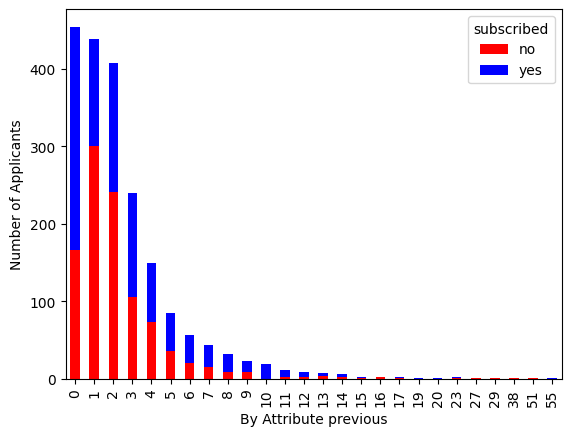

Column: poutcome
Description:  outcome of the previous marketing campaign (categorical: unknown,other,failure,success)


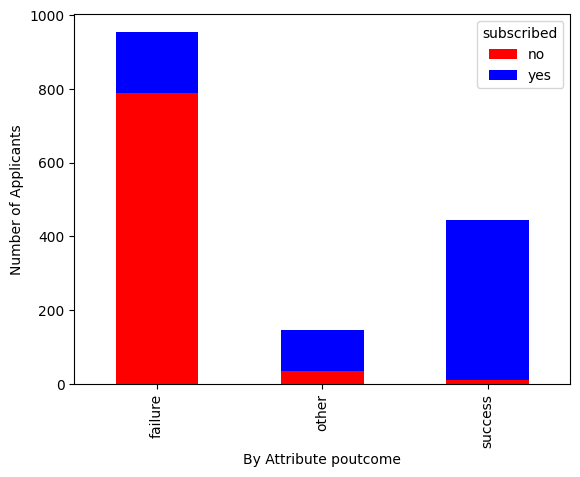

In [61]:
# df.columns, exclude binary columns for the moment
columns_to_graph = ['age','day','month','duration','pdays','previous','poutcome']
for column in columns_to_graph:
    print(f"Column: {column}")
    print(f"Description: {col_dict[column]}")
    

    crosstab_CL = pd.crosstab(df[column], df['subscribed'])
    crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
    plt.xlabel('By Attribute ' + column)
    plt.ylabel('Number of Applicants')
    plt.show()

##  E-tivity Task - Item - Question Conclusion
**Customer Selection / Targeting**

***Note: Draws on graphs from Distribution Analysis for Categorical Attributes section also, where these graph subscribed/calculate subcribed percentage***

Contact People with the following attributes before other people

    1. Those that had a previous outcome of the marketing campaign was success or other.
    1. Students, Retired, Unemployed people
    1. Age 31-54
    1. Balance between 315 and 2304 
    1. Self employed, management, housemaids and admin,technican, blue-collar services.
        1. However, note that those with technical, management and bluecollar jobs, will have higher degree of rejections than other categories
    1. Those that didn't have housing
    1. Single then Married
    1. With a secondary or tertiary education
    1. Contacted less than 4 times.

**Campaign Execution**

The campaign should be run as follows:

    1. Customers should be contacted via their cellular
    1. The campaign have most success when run in March to November, so ideally run the campaign in these months


## Misc Workings for reference